In [4]:
import csv
with open('songs.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['id', 'title', 'artist', 'top genre', 'year', 'energy', 'danceability', 'liveness', 'acousticness', 'speechiness', 'pop']
['1', 'Hey, Soul Sister', 'Train', 'neo mellow', '2010', '89', '67', '8', '19', '4', '83']
['2', 'Love The Way You Lie', 'Eminem', 'detroit hip hop', '2010', '93', '75', '52', '24', '23', '82']
['3', 'TiK ToK', 'Kesha', 'dance pop', '2010', '84', '76', '29', '10', '14', '80']
['4', 'Bad Romance', 'Lady Gaga', 'dance pop', '2010', '92', '70', '8', '0', '4', '79']
['5', 'Just the Way You Are', 'Bruno Mars', 'pop', '2010', '84', '64', '9', '2', '4', '78']
['6', 'Baby', 'Justin Bieber', 'canadian pop', '2010', '86', '73', '11', '4', '14', '77']
['7', 'Dynamite', 'Taio Cruz', 'dance pop', '2010', '78', '75', '4', '0', '9', '77']
['8', 'Secrets', 'OneRepublic', 'dance pop', '2010', '76', '52', '12', '7', '4', '77']
['9', 'Empire State of Mind (Part II) Broken Down', 'Alicia Keys', 'hip pop', '2010', '37', '48', '12', '74', '3', '76']
['10', 'Only Girl (In The World)', 'R

In [5]:
import pandas as pd
data = pd.read_csv("songs.csv",engine='python') 
# Preview the first 5 lines of the loaded data 
data

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,89,67,8,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,93,75,52,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,84,76,29,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,92,70,8,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,84,64,9,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,66,61,20,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,79,75,7,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,76,53,9,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,79,60,42,1,7,69


In [6]:
data.describe()

,id,year,energy,danceability,liveness,acousticness,speechiness,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,70.504146,64.379768,17.774461,14.326700,8.358209,66.520730
std,174.215384,2.607057,16.310664,13.378718,13.102543,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,61.000000,57.000000,9.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,74.000000,66.000000,12.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,82.000000,73.000000,24.000000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,98.000000,97.000000,74.000000,99.000000,48.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F346FB68C8>,
      dtype=object)

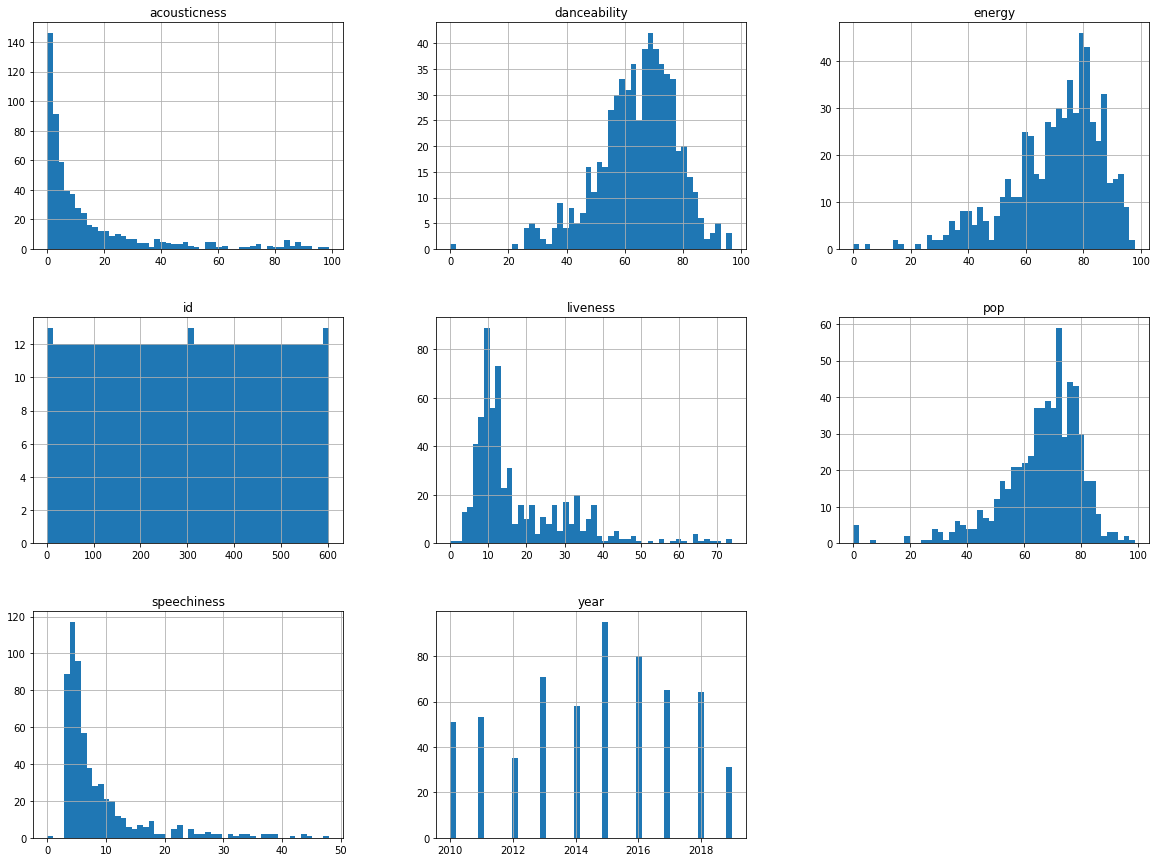

In [11]:
from matplotlib import pyplot as plt
data.hist(bins=50,figsize=(20,15))

In [12]:
# remove song names, artist and id before clustering
data_features = data.copy()
data_features = data_features.drop(['title','artist','id','year','top genre'],axis=1)
data_features

,energy,danceability,liveness,acousticness,speechiness,pop
0,89,67,8,19,4,83
1,93,75,52,24,23,82
2,84,76,29,10,14,80
3,92,70,8,0,4,79
4,84,64,9,2,4,78
...,...,...,...,...,...,...
598,66,61,20,1,3,75
599,79,75,7,21,12,75
600,76,53,9,7,34,70
601,79,60,42,1,7,69


In [14]:
#from sklearn.metrics import silhouette_score
#from sklearn.cluster import KMeans
#for n_clusters in range(2,15):
#    clusterer = KMeans (n_clusters=n_clusters)
#    preds = clusterer.fit_predict(data_features)
#    centers = clusterer.cluster_centers_

#    score = silhouette_score (data_features, preds, metric='euclidean')
#    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

In [15]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_features)
    Sum_of_squared_distances.append(km.inertia_)

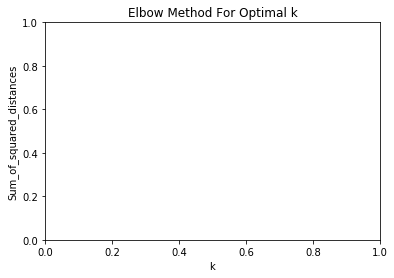

In [8]:
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [33]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(data_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_features)


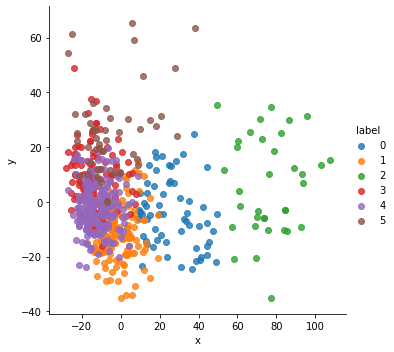

In [11]:
import seaborn as sns
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [35]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(data_features)

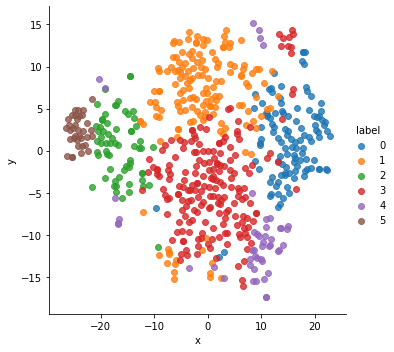

In [36]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [37]:
pca.explained_variance_ratio_

array([0.43798608, 0.17454666])

In [38]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=data_features.columns,index = ['PC-1','PC-2']))

        energy  danceability  liveness  acousticness  speechiness       pop
PC-1 -0.538315     -0.183234 -0.106366      0.814941    -0.015063  0.031170
PC-2  0.150331     -0.408807  0.324991      0.082877     0.066276 -0.832704


In [39]:
data['label'] = y_kmeans

# shuffle dataset

data = data.sample(frac=1)
data['label'].value_counts()

3    193
1    153
0    110
2     64
4     48
5     35
Name: label, dtype: int64

In [40]:
data[data['label'] == 0].tail(112)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
337,338,Been You,Justin Bieber,canadian pop,2015,78,74,32,2,7,60,0
188,189,TKO,Justin Timberlake,dance pop,2013,68,61,43,1,24,58,0
500,501,Greenlight (feat. Flo Rida & LunchMoney Lewis),Pitbull,dance pop,2017,83,70,36,28,27,54,0
581,582,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,89,67,74,30,6,90,0
393,394,Toothbrush,DNCE,dance pop,2016,79,55,47,12,13,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...
478,479,Rich Love (with Seeb),OneRepublic,dance pop,2017,87,40,36,17,31,70,0
316,317,I Lived,OneRepublic,dance pop,2015,85,59,27,7,4,67,0
483,484,Cut To The Feeling,Carly Rae Jepsen,canadian pop,2017,91,71,30,1,6,69,0
31,32,My First Kiss - feat. Ke$ha,3OH!3,dance pop,2010,89,68,36,1,8,62,0


In [41]:
data['top genre'][data['label'] == 0].value_counts()

dance pop           64
pop                 11
canadian pop         6
boy band             3
barbadian pop        3
atl hip hop          3
australian pop       3
big room             2
electropop           2
indie pop            2
tropical house       2
escape room          1
detroit hip hop      1
colombian pop        1
chicago rap          1
candy pop            1
british soul         1
hip hop              1
french indie pop     1
edm                  1
Name: top genre, dtype: int64

In [19]:
data[data['label'] == 1].tail(35)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
374,375,Work from Home (feat. Ty Dolla $ign),Fifth Harmony,dance pop,2016,59,80,6,10,4,79,1
182,183,Heartbreaker,Justin Bieber,canadian pop,2013,52,56,34,14,10,61,1
509,510,Havana (feat. Young Thug),Camila Cabello,dance pop,2018,52,77,13,18,3,85,1
172,173,Suit & Tie,Justin Timberlake,dance pop,2013,60,80,16,10,22,68,1
501,502,Influence,Tove Lo,dance pop,2017,59,77,11,10,5,54,1
594,595,No Guidance (feat. Drake),Chris Brown,dance pop,2019,45,70,16,12,15,81,1
518,519,Attention,Charlie Puth,dance pop,2018,61,78,13,11,5,83,1
270,271,The Hills,The Weeknd,canadian contemporary r&b,2015,56,58,14,7,5,84,1
291,292,Break Free,Ariana Grande,dance pop,2015,70,69,20,1,5,75,1
515,516,In My Blood,Shawn Mendes,canadian pop,2018,71,62,13,6,7,83,1


In [42]:
data['top genre'][data['label'] == 0].value_counts()

dance pop           64
pop                 11
canadian pop         6
boy band             3
barbadian pop        3
atl hip hop          3
australian pop       3
big room             2
electropop           2
indie pop            2
tropical house       2
escape room          1
detroit hip hop      1
colombian pop        1
chicago rap          1
candy pop            1
british soul         1
hip hop              1
french indie pop     1
edm                  1
Name: top genre, dtype: int64

In [43]:
data[data['label'] == 2].tail(194)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
74,75,Without You (feat. Usher),David Guetta,dance pop,2011,61,61,16,23,3,68,2
476,477,"How Far I'll Go - From ""Moana""",Alessia Cara,canadian contemporary r&b,2017,54,31,7,16,35,71,2
196,197,Anything Could Happen,Ellie Goulding,dance pop,2013,78,70,14,43,3,52,2
135,136,You Da One,Rihanna,barbadian pop,2012,72,70,13,50,4,57,2
279,280,What Do You Mean?,Justin Bieber,canadian pop,2015,57,85,8,59,10,79,2
...,...,...,...,...,...,...,...,...,...,...,...,...
325,326,On My Mind,Ellie Goulding,dance pop,2015,71,70,9,26,5,65,2
302,303,Sing,Ed Sheeran,pop,2015,67,82,6,30,5,71,2
148,149,Wrecking Ball,Miley Cyrus,dance pop,2013,42,53,11,41,3,77,2
141,142,Story of My Life,One Direction,boy band,2013,66,60,12,23,5,81,2


In [44]:
data['top genre'][data['label'] == 2].value_counts()

dance pop                    28
pop                          11
canadian contemporary r&b     3
canadian pop                  3
art pop                       2
electropop                    2
british soul                  2
complextro                    2
big room                      1
danish pop                    1
hip pop                       1
folk-pop                      1
brostep                       1
barbadian pop                 1
downtempo                     1
neo mellow                    1
boy band                      1
hip hop                       1
irish singer-songwriter       1
Name: top genre, dtype: int64

In [23]:
data[data['label'] == 3].tail(49)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
37,38,If I Had You,Adam Lambert,australian pop,2010,91,65,37,1,11,59,3
194,195,Take Back the Night,Justin Timberlake,dance pop,2013,66,59,64,4,16,54,3
56,57,Run the World (Girls),Beyoncé,dance pop,2011,90,73,37,0,14,76,3
77,78,E.T.,Katy Perry,dance pop,2011,87,62,37,2,18,66,3
214,215,Rude,MAGIC!,pop,2014,76,77,31,4,4,79,3
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,93,75,52,24,23,82,3
407,408,Out Of The Woods,Taylor Swift,pop,2016,84,55,34,0,4,66,3
500,501,Greenlight (feat. Flo Rida & LunchMoney Lewis),Pitbull,dance pop,2017,83,70,36,28,27,54,3
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,79,60,42,1,7,69,3
478,479,Rich Love (with Seeb),OneRepublic,dance pop,2017,87,40,36,17,31,70,3


In [45]:
data['top genre'][data['label'] == 3].value_counts()

dance pop                    107
pop                           14
canadian pop                  12
boy band                       8
australian dance               5
barbadian pop                  5
big room                       4
complextro                     4
neo mellow                     3
canadian contemporary r&b      3
electropop                     3
colombian pop                  2
british soul                   2
latin                          2
art pop                        2
baroque pop                    2
hip pop                        2
electro house                  1
celtic rock                    1
candy pop                      1
brostep                        1
electro                        1
acoustic pop                   1
house                          1
moroccan pop                   1
atl hip hop                    1
permanent wave                 1
australian pop                 1
belgian edm                    1
electronic trap                1
Name: top 

In [46]:
data[data['label'] == 4].tail(149)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
266,267,I Luh Ya Papi,Jennifer Lopez,dance pop,2014,73,74,12,45,42,28,4
441,442,Behind Your Back,Nelly Furtado,canadian latin,2016,47,80,7,25,4,18,4
434,435,Invitation,Britney Spears,dance pop,2016,65,37,9,3,11,44,4
100,101,Moment 4 Life - Album Version (Edited),Nicki Minaj,dance pop,2011,88,50,22,39,38,28,4
264,265,Cannonball,Lea Michele,hollywood,2014,82,56,19,2,5,37,4
205,206,Right Now - Dyro Radio Edit,Rihanna,barbadian pop,2013,74,53,24,0,4,42,4
209,210,Freak,Kelly Rowland,atl hip hop,2013,78,65,12,13,6,28,4
256,257,Drunk in Love,Beyoncé,dance pop,2014,62,59,18,1,5,52,4
208,209,Outta Nowhere (feat. Danny Mercer),Pitbull,dance pop,2013,84,71,21,16,3,35,4
428,429,Make Me Like You,Gwen Stefani,dance pop,2016,71,74,13,4,5,50,4


In [47]:
data['top genre'][data['label'] == 4].value_counts()

dance pop         36
pop                2
atl hip hop        1
permanent wave     1
canadian latin     1
british soul       1
alaska indie       1
big room           1
hollywood          1
hip pop            1
latin              1
barbadian pop      1
Name: top genre, dtype: int64

In [27]:
data[data['label'] == 5].tail(64)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
50,51,Hello,Martin Solveig,big room,2010,98,67,10,1,3,0,5
356,357,Mr. Put It Down,Ricky Martin,dance pop,2015,78,80,4,1,18,42,5
137,138,It Will Rain,Bruno Mars,pop,2012,84,58,8,34,5,38,5
201,202,Crazy Kids (feat. will.i.am),Kesha,dance pop,2013,75,72,13,4,4,46,5
256,257,Drunk in Love,Beyoncé,dance pop,2014,62,59,18,1,5,52,5
49,50,Break Your Heart,Taio Cruz,dance pop,2010,90,67,8,0,3,33,5
441,442,Behind Your Back,Nelly Furtado,canadian latin,2016,47,80,7,25,4,18,5
202,203,"Ooh La La (from ""The Smurfs 2"")",Britney Spears,dance pop,2013,57,69,11,2,5,45,5
362,363,L.A.LOVE (la la),Fergie,dance pop,2015,39,48,26,2,9,0,5
209,210,Freak,Kelly Rowland,atl hip hop,2013,78,65,12,13,6,28,5


In [48]:
data['top genre'][data['label'] == 5].value_counts()

dance pop           8
neo mellow          5
canadian pop        5
pop                 4
british soul        3
art pop             2
hip pop             1
detroit hip hop     1
permanent wave      1
boy band            1
folk-pop            1
australian dance    1
barbadian pop       1
acoustic pop        1
Name: top genre, dtype: int64

In [49]:
data[data['label']==0].mean()

id               242.281818
year            2013.681818
energy            80.500000
danceability      62.809091
liveness          38.990909
acousticness       6.554545
speechiness        9.927273
pop               66.018182
label              0.000000
dtype: float64

In [50]:
data[data['label']==1].mean()

id               356.803922
year            2015.503268
energy            60.993464
danceability      70.032680
liveness          13.908497
acousticness       6.320261
speechiness        8.045752
pop               73.196078
label              1.000000
dtype: float64

In [51]:
data[data['label']==2].mean()

id               343.671875
year            2015.343750
energy            61.406250
danceability      61.515625
liveness          13.296875
acousticness      38.437500
speechiness        7.671875
pop               71.671875
label              2.000000
dtype: float64

In [52]:
data[data['label']==3].mean()

id               276.129534
year            2014.207254
energy            81.761658
danceability      63.922280
liveness          11.233161
acousticness       6.181347
speechiness        7.984456
pop               68.217617
label              3.000000
dtype: float64

In [53]:
data[data['label']==4].mean()

id               296.187500
year            2014.104167
energy            71.000000
danceability      67.520833
liveness          16.229167
acousticness      10.479167
speechiness        9.541667
pop               33.333333
label              4.000000
dtype: float64

In [54]:
data[data['label']==5].mean()

id               324.542857
year            2014.885714
energy            34.542857
danceability      48.057143
liveness          14.371429
acousticness      79.857143
speechiness        6.485714
pop               65.657143
label              5.000000
dtype: float64

In [ ]:
data[data['label']==0].hist()

In [ ]:
input1 = input("Enter song1: ")
input2 = input("Enter song2: ")
input3 = input("Enter song3: ")